# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observable trends:

1) The equator (latitude=0) is the hottest place on earth and as you move further away from the equator the max temperatures drop. The southern hemisphere seems to be warmer than the northen hemisphere this time of year.

2) The wind speed does not change much with latitude as the wind speeds are clustered between 0-20mph.

3) There is no relationship between latitude and cloudiness

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sts
from scipy.stats import linregress
import json
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_list = []
country = []
temp = []
humidity = []
wind_speed = []
clouds = []
latitude = []
longitude = []
date = []
index_counter = 0
set_counter = 1

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [6]:
print("Start data retrieval")
print("------------------")
for city in cities:
    response = requests.get(query_url + city).json()
    if index_counter > 49:
        index_counter = 0
        set_counter += 1
    else:
        index_counter +=1 
    print (f"City number {index_counter} of set {set_counter} - {city}")
    print(query_url+city)
    
    try:
        country.append(response["sys"]["country"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        wind_speed.append(response["wind"]["speed"])
        clouds.append(response["clouds"]["all"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        date.append(response["dt"])
        city_list.append(city)
    except:
        print("City not found")
        
print("-------------------")
print("Data retrieval complete")

Start data retrieval
------------------
City number 1 of set 1 - busselton
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=busselton
City number 2 of set 1 - leiyang
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=leiyang
City number 3 of set 1 - diamantino
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=diamantino
City number 4 of set 1 - tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=tasiilaq
City number 5 of set 1 - narsaq
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=narsaq
City number 6 of set 1 - mandalgovi
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=mandalgovi
City number 7 of set 1 - phangnga
http://api.openweathermap.org/data/2.5/weather

City number 5 of set 2 - jaguarari
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=jaguarari
City number 6 of set 2 - aksu
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=aksu
City number 7 of set 2 - lorengau
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=lorengau
City number 8 of set 2 - vaini
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=vaini
City number 9 of set 2 - nalut
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=nalut
City number 10 of set 2 - magistralnyy
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=magistralnyy
City number 11 of set 2 - hilo
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q

City number 11 of set 3 - iquitos
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=iquitos
City number 12 of set 3 - amderma
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=amderma
City not found
City number 13 of set 3 - sindou
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=sindou
City number 14 of set 3 - toliary
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=toliary
City not found
City number 15 of set 3 - port hardy
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=port hardy
City number 16 of set 3 - salinopolis
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=salinopolis
City number 17 of set 3 - ilulissat
http://api.openweathermap.org/data/2.5/weather?appid

City number 17 of set 4 - marcona
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=marcona
City not found
City number 18 of set 4 - paradwip
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=paradwip
City not found
City number 19 of set 4 - portland
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=portland
City number 20 of set 4 - manzanillo
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=manzanillo
City number 21 of set 4 - santa cruz
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=santa cruz
City number 22 of set 4 - ternate
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=ternate
City number 23 of set 4 - bira
http://api.openweathermap.org/data/2.5/weather?appid=

City number 22 of set 5 - manono
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=manono
City number 23 of set 5 - borama
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=borama
City not found
City number 24 of set 5 - dondo
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=dondo
City number 25 of set 5 - almaznyy
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=almaznyy
City number 26 of set 5 - belyy yar
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=belyy yar
City number 27 of set 5 - nenjiang
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=nenjiang
City number 28 of set 5 - la tuque
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678

City number 28 of set 6 - aykhal
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=aykhal
City number 29 of set 6 - bethel
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=bethel
City number 30 of set 6 - sabzevar
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=sabzevar
City number 31 of set 6 - rawson
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=rawson
City number 32 of set 6 - meulaboh
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=meulaboh
City number 33 of set 6 - aleksandrov gay
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=aleksandrov gay
City number 34 of set 6 - upernavik
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678

City number 33 of set 7 - makat
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=makat
City number 34 of set 7 - necochea
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=necochea
City number 35 of set 7 - lofthus
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=lofthus
City number 36 of set 7 - inuvik
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=inuvik
City number 37 of set 7 - port lincoln
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=port lincoln
City number 38 of set 7 - fountain hills
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=fountain hills
City number 39 of set 7 - mountain brook
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a6

City number 39 of set 8 - vikhorevka
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=vikhorevka
City number 40 of set 8 - eldama ravine
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=eldama ravine
City number 41 of set 8 - trairi
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=trairi
City number 42 of set 8 - shingu
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=shingu
City number 43 of set 8 - hofn
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=hofn
City number 44 of set 8 - isla del bosque
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=isla del bosque
City number 45 of set 8 - cayenne
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a

City number 44 of set 9 - kahului
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=kahului
City number 45 of set 9 - vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=vestmannaeyjar
City number 46 of set 9 - tobolsk
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=tobolsk
City number 47 of set 9 - cockburn town
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=cockburn town
City number 48 of set 9 - berlevag
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=berlevag
City number 49 of set 9 - enid
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=enid
City number 50 of set 9 - sangar
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c7

City number 48 of set 10 - sur
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=sur
City number 49 of set 10 - pucallpa
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=pucallpa
City number 50 of set 10 - grindavik
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=grindavik
City number 0 of set 11 - banjarmasin
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=banjarmasin
City number 1 of set 11 - port hedland
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=port hedland
City number 2 of set 11 - dibaya
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=dibaya
City not found
City number 3 of set 11 - inta
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691

City number 1 of set 12 - kungurtug
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=kungurtug
City number 2 of set 12 - orbetello
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=orbetello
City number 3 of set 12 - isoka
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=isoka
City number 4 of set 12 - muriwai beach
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=muriwai beach
City number 5 of set 12 - grand river south east
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=grand river south east
City not found
City number 6 of set 12 - qingdao
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=qingdao
City number 7 of set 12 - vanino
http://api.openweathermap.org/data/2

City number 5 of set 13 - manuk mangkaw
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=manuk mangkaw
City number 6 of set 13 - vilyuysk
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=vilyuysk
City number 7 of set 13 - barra do corda
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=barra do corda
City number 8 of set 13 - warqla
http://api.openweathermap.org/data/2.5/weather?appid=fcfeca45224691a694a2c72f678e3f55&units=imperial&q=warqla
City not found
-------------------
Data retrieval complete


In [7]:

print(len(city_list))   
print(len(country)) 
print(len(temp)) 
print(len(humidity)) 
print(len(wind_speed)) 
print(len(clouds)) 
print(len(latitude)) 
print(len(longitude))


568
568
568
568
568
568
568
568


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
 city_data = pd.DataFrame({"City":city_list,
                          "Country": country,
                          "Date":date,
                          "Max Temp (F)":temp,
                          "Humidity (%)":humidity,
                          "Wind Speed":wind_speed, 
                          "Cloudiness (%)": clouds,
                          "Latitude":latitude,
                          "Longitude":longitude})   
city_data.head()

,City,Country,Date,Max Temp (F),Humidity (%),Wind Speed,Cloudiness (%),Latitude,Longitude
0,busselton,AU,1604591183,63.00,42,15.26,13,-33.65,115.33
1,leiyang,CN,1604591183,61.75,72,3.76,3,26.40,112.86
2,diamantino,BR,1604591183,99.99,26,1.10,12,-14.41,-56.45
3,tasiilaq,GL,1604591183,28.40,92,6.93,90,65.61,-37.64
4,narsaq,GL,1604591184,26.60,42,11.41,20,60.92,-46.05


In [9]:
city_data.count()

City              568
Country           568
Date              568
Max Temp (F)      568
Humidity (%)      568
Wind Speed        568
Cloudiness (%)    568
Latitude          568
Longitude         568
dtype: int64

In [10]:
city_data.to_csv(output_data_file,index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
humidity_df = city_data.loc[city_data["Humidity (%)"]>100,:]
humidity_df.count()

City              0
Country           0
Date              0
Max Temp (F)      0
Humidity (%)      0
Wind Speed        0
Cloudiness (%)    0
Latitude          0
Longitude         0
dtype: int64

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

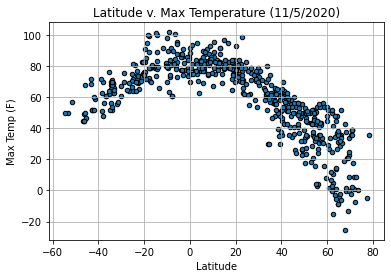

In [16]:
city_data.plot(kind="scatter",x="Latitude", y="Max Temp (F)",edgecolor="black",title="Latitude v. Max Temperature (11/5/2020)",grid=True)
plt.savefig("output_data/LatvTemp.png")
plt.show()

## Latitude vs. Humidity Plot

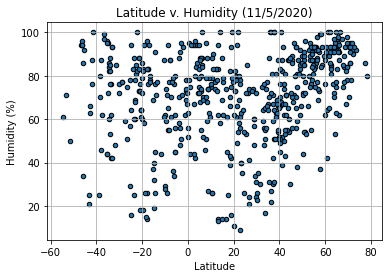

In [18]:
city_data.plot(kind="scatter",x="Latitude", y="Humidity (%)",edgecolor="black",title="Latitude v. Humidity (11/5/2020)",grid=True)
plt.savefig("output_data/LatvHumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

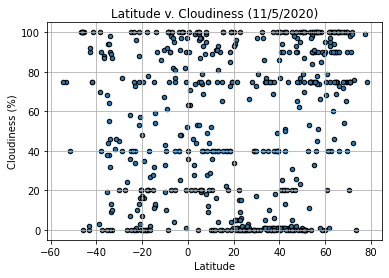

In [19]:
city_data.plot(kind="scatter",x="Latitude", y="Cloudiness (%)",edgecolor="black",title="Latitude v. Cloudiness (11/5/2020)",grid=True)
plt.savefig("output_data/LatvCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

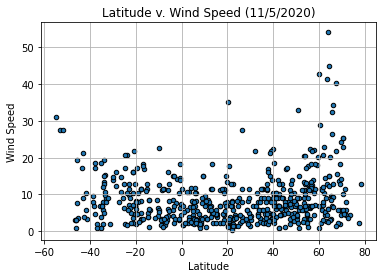

In [20]:
city_data.plot(kind="scatter",x="Latitude", y="Wind Speed",edgecolor="black",title="Latitude v. Wind Speed (11/5/2020)",grid=True)
plt.savefig("output_data/LatvWindspeed.png")
plt.show()

## Linear Regression

In [21]:
northern_hemi_df = city_data.loc[city_data["Latitude"]>= 0,:]
northern_hemi_df["Latitude"].count()

402

In [22]:
southern_hemi_df = city_data.loc[city_data["Latitude"]< 0,:]
southern_hemi_df["Latitude"].count()

166

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [57]:
slope, intercept,rvalue,pvalue,sems = linregress(northern_hemi_df["Latitude"],northern_hemi_df["Max Temp (F)"])
regress_values = slope*(northern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(northern_hemi_df["Latitude"],northern_hemi_df["Max Temp (F)"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

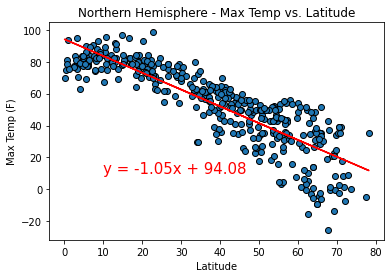

The correlation coefficient is -0.86, indicating there is a strong negative relationship 


In [58]:
plt.scatter(northern_hemi_df["Latitude"],northern_hemi_df["Max Temp (F)"], edgecolor='black')
plt.plot(northern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.annotate(eq,(10,10),color="r",fontsize=15)
plt.savefig("output_data/NHTempvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, indicating there is a strong negative relationship ")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [59]:
slope, intercept,rvalue,pvalue,sems = linregress(southern_hemi_df["Latitude"],southern_hemi_df["Max Temp (F)"])
regress_values = slope*(southern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(southern_hemi_df["Latitude"],southern_hemi_df["Max Temp (F)"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

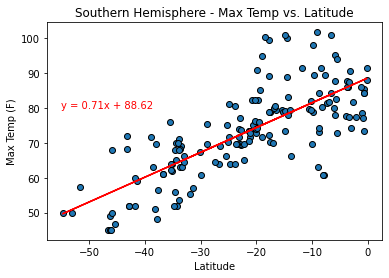

The correlation coefficient is 0.76, indicating there is a moderate-strong positive relationship 


In [60]:
plt.scatter(southern_hemi_df["Latitude"],southern_hemi_df["Max Temp (F)"], edgecolor='black')
plt.plot(southern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.annotate(eq, (-55,80),color="r")
plt.savefig("output_data/SHTempvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, indicating there is a moderate-strong positive relationship ")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [61]:
slope, intercept,rvalue,pvalue,sems = linregress(northern_hemi_df["Latitude"],northern_hemi_df["Humidity (%)"])
regress_values = slope*(northern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(northern_hemi_df["Latitude"],northern_hemi_df["Humidity (%)"])[0],2)
eq = eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

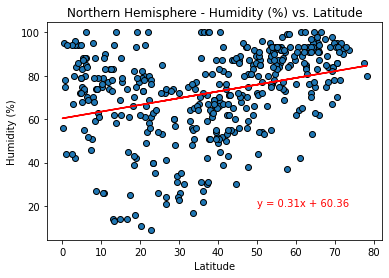

The correlation coefficient is 0.32, indicating there is a weak positive relationship 


In [62]:
plt.scatter(northern_hemi_df["Latitude"],northern_hemi_df["Humidity (%)"], edgecolor='black')
plt.plot(northern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.annotate(eq, (50,20),color="r")
plt.savefig("output_data/NHHumidvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, indicating there is a weak positive relationship ")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [63]:
slope, intercept,rvalue,pvalue,sems = linregress(southern_hemi_df["Latitude"],southern_hemi_df["Humidity (%)"])
regress_values = slope*(southern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(southern_hemi_df["Latitude"],southern_hemi_df["Humidity (%)"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

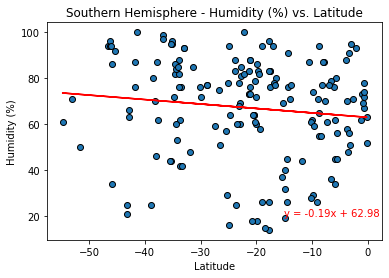

The correlation coefficient is -0.12, indicating there is a weak negative relationship 


In [64]:
plt.scatter(southern_hemi_df["Latitude"],southern_hemi_df["Humidity (%)"], edgecolor='black')
plt.plot(southern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.annotate(eq,(-15,20),color="r")
plt.savefig("output_data/SHHumidvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, indicating there is a weak negative relationship ")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [65]:
slope, intercept,rvalue,pvalue,sems = linregress(northern_hemi_df["Latitude"],northern_hemi_df["Cloudiness (%)"])
regress_values = slope*(northern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(northern_hemi_df["Latitude"],northern_hemi_df["Cloudiness (%)"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

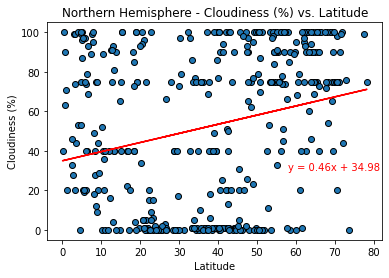

The correlation coefficient is 0.25, indicating there is a weak positive relationship 


In [66]:
plt.scatter(northern_hemi_df["Latitude"],northern_hemi_df["Cloudiness (%)"], edgecolor='black')
plt.plot(northern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.annotate(eq, (58,30),color="r")
plt.savefig("output_data/NHCloudvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, indicating there is a weak positive relationship ")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [67]:
slope, intercept,rvalue,pvalue,sems = linregress(southern_hemi_df["Latitude"],southern_hemi_df["Cloudiness (%)"])
regress_values = slope*(southern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(southern_hemi_df["Latitude"],southern_hemi_df["Cloudiness (%)"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

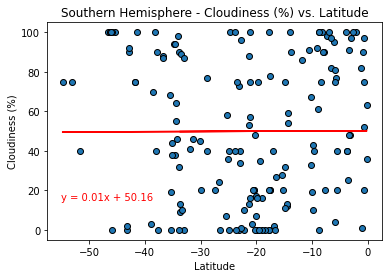

The correlation coefficient is 0.0, indicating there is no relationship 


In [68]:
plt.scatter(southern_hemi_df["Latitude"],southern_hemi_df["Cloudiness (%)"], edgecolor='black')
plt.plot(southern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.annotate(eq,(-55,15),color='r')
plt.savefig("output_data/SHCloudvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, indicating there is no relationship ")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [69]:
slope, intercept,rvalue,pvalue,sems = linregress(northern_hemi_df["Latitude"],northern_hemi_df["Wind Speed"])
regress_values = slope*(northern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(northern_hemi_df["Latitude"],northern_hemi_df["Wind Speed"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

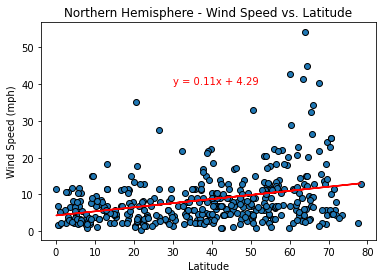

The correlation coefficient is 0.32, indicating there is a weak positive relationship 


In [70]:
plt.scatter(northern_hemi_df["Latitude"],northern_hemi_df["Wind Speed"], edgecolor='black')
plt.plot(northern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('Northern Hemisphere - Wind Speed vs. Latitude')
plt.annotate(eq,(30,40),color="r")
plt.savefig("output_data/NHwindspeedvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, indicating there is a weak positive relationship ")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [71]:
slope, intercept,rvalue,pvalue,sems = linregress(southern_hemi_df["Latitude"],southern_hemi_df["Wind Speed"])
regress_values = slope*(southern_hemi_df["Latitude"])+intercept
cc = round(sts.pearsonr(southern_hemi_df["Latitude"],southern_hemi_df["Wind Speed"])[0],2)
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

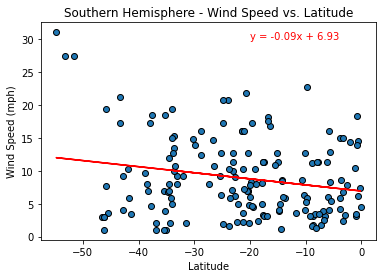

The correlation coefficient is -0.21, indicating there is a weak negative relationship 


In [72]:
plt.scatter(southern_hemi_df["Latitude"],southern_hemi_df["Wind Speed"], edgecolor='black')
plt.plot(southern_hemi_df["Latitude"],regress_values, color='r')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')
plt.annotate(eq,(-20,30),color="r")
plt.savefig("output_data/SHwindspeedvLat.png")
plt.show()
print(f"The correlation coefficient is {cc}, indicating there is a weak negative relationship ")